In [1]:
import matplotlib as mpl
from svgpath2mpl import parse_path
from svgpathtools import svg2paths
from matplotlib import animation

planet_path, attributes = svg2paths('saturn.svg')
planet_marker = parse_path(attributes[0]['d'])
planet_marker.vertices -= planet_marker.vertices.mean(axis=0)
planet_marker =planet_marker.transformed(mpl.transforms.Affine2D().rotate_deg(180))
planet_marker= planet_marker.transformed(mpl.transforms.Affine2D().scale(-1,1))

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def theta_to_coord(theta):
    x = np.cos(theta)
    y = np.sin(theta)
    return np.array([x,y])

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


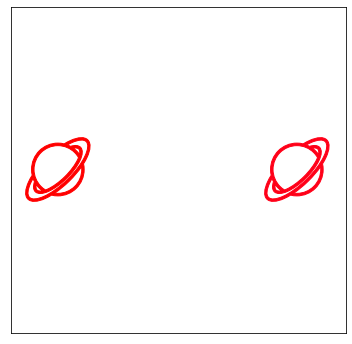

In [36]:
theta_arr = np.linspace(0,2*np.pi,100)
spin_arr = np.linspace(0,12*np.pi,100)[::-1]

x, y = theta_to_coord(theta_arr)

cmap = plt.get_cmap('hsv')
colors = np.array([cmap(i) for i in np.linspace(0,1,100)])

fig = plt.figure(figsize=(6,6),facecolor='white')
ax = fig.add_subplot()
ax.axis([-1.4,1.4,-1.4,1.4])
ax.set_xticks([])
ax.set_yticks([])

line, = plt.plot(x[0],y[0],marker=planet_marker,markersize=70,c=colors[0])
line2, = plt.plot(-1*x[0],-1*y[0],marker=planet_marker,markersize=70,c=colors[-1])
deg_rot = 0

def update(i):
    marker =planet_marker.transformed(mpl.transforms.Affine2D().rotate_deg(spin_arr[i]*180/np.pi))
    line.set_data(x[i],y[i])
    line.set_marker(marker)
    line.set_color(colors[i])
    
    line2.set_data(-1*x[i],-1*y[i])
    line2.set_marker(marker)
    line2.set_color(colors[::-1][i])
    return line, line2,
    
ani = animation.FuncAnimation(fig, update, frames=len(theta_arr),interval=50, blit=True,repeat=True)

ani.save('spinning planet.gif', writer='imagemagick')

plt.show()

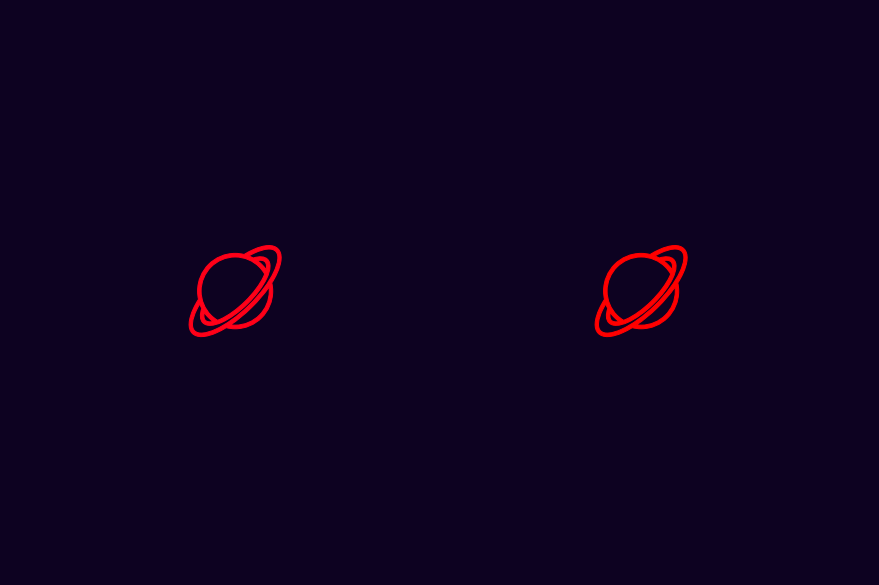

In [33]:
theta_arr = np.linspace(0,2*np.pi,130)
spin_arr = np.linspace(0,12*np.pi,130)[::-1]

x, y = theta_to_coord(theta_arr)

cmap = plt.get_cmap('hsv')
colors = np.array([cmap(i) for i in np.linspace(0,1,130)])

fig = plt.figure(figsize=(15.5,10.5),facecolor='#0d0221')
ax = fig.add_subplot()
ax.axis([-2.13,2.13,-1.4,1.4])
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')
ax.set_facecolor('#0d0221')

line, = plt.plot(x[0],y[0],marker=planet_marker,markersize=100,c=colors[0])
line2, = plt.plot(-1*x[0],-1*y[0],marker=planet_marker,markersize=100,c=colors[-1])
deg_rot = 0

def update(i):
    marker =planet_marker.transformed(mpl.transforms.Affine2D().rotate_deg(spin_arr[i]*180/np.pi))
    line.set_data(x[i],y[i])
    line.set_marker(marker)
    line.set_color(colors[i])
    
    line2.set_data(-1*x[i],-1*y[i])
    line2.set_marker(marker)
    line2.set_color(colors[::-1][i])
    return line, line2,
   
# plt.plot(x,y)
# plt.plot(0,0,'o',markersize=400,alpha=0.5)

ani = animation.FuncAnimation(fig, update, frames=130,interval=1000, blit=True,repeat=False)
writergif = animation.PillowWriter(fps=25,bitrate=50) 

ani.save('spinning planet screensaver night.gif', writer=writergif,savefig_kwargs={'facecolor':'#0d0221'})

plt.show()

In [8]:
print((16/9)*1.4)

2.4888888888888885
